In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df = pd.read_csv("../monitoring/metrics.csv")

In [17]:
df = df.iloc[700:]

In [10]:
df.columns

Index(['timestamp', 'index', 'name', 'gpu_memory_util', 'gpu_util', 'power',
       'total_energy', 'temperature', 'gpu_memory_total',
       'gpu_memory_reserved', 'gpu_memory_free', 'gpu_memory_used', 'cpu_util',
       'host_memory_total', 'host_memory_used', 'host_memory_free',
       'host_memory_percentage'],
      dtype='object')

<Axes: >

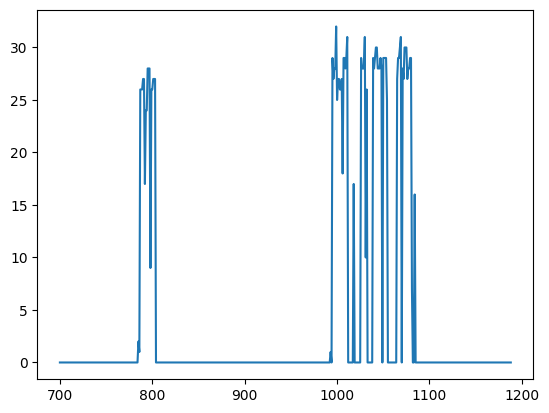

In [18]:
df["gpu_util"].plot()

In [26]:
df["gpu_util"].to_numpy()

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        2,  1, 26, 26, 26, 27, 27, 17, 24, 24, 28, 28, 28,  9, 26, 26, 27,
       27, 27,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

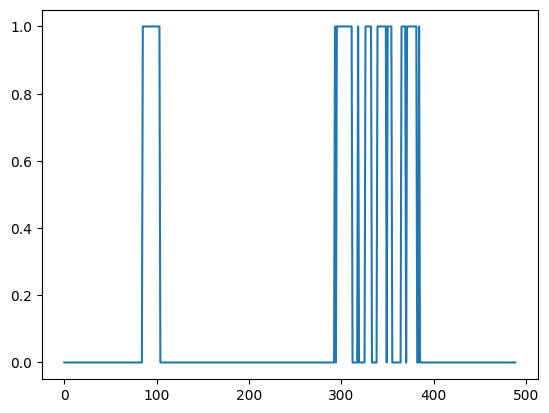

In [30]:
used = df["gpu_util"].to_numpy() > 0
plt.plot(used)

In [ ]:
diffs = np.diff(used.astype(int))
plt.scatter(np.where(diffs), diffs[np.where(diffs)], marker="x")

In [59]:
start = np.where(diffs > 0)
end = np.where(diffs <0)

In [64]:
end[0] -start[0]

array([19,  1, 17,  1,  7, 10,  5,  5, 11,  1])

<Axes: >

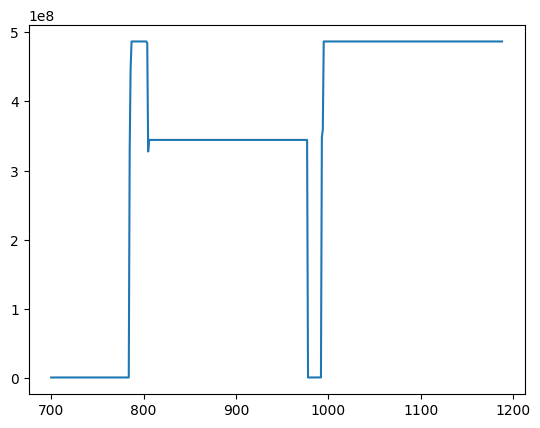

In [20]:
df["gpu_memory_used"].plot()